### Import relevent libraries

In [11]:
import requests
import os

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering the data

In [13]:
folder_name = 'image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [14]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [15]:
with open(os.path.join(folder_name,url.split('/')[-1] ), mode='wb') as file:
    file.write(r.content)

In [16]:
file

<_io.BufferedWriter name='image_pred\\image-predictions.tsv'>

In [17]:
#read the dataset
image_pred = pd.read_csv('image_pred\\image-predictions.tsv',sep='\t')

In [18]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [19]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
#pip install tweepy

In [22]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer



In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [23]:
selected_col= []

with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_col.append({'tweet_id': json_data['id'],
                            'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                              'timestamp': json_data['created_at']      
                            })
        
tweet_selected = pd.DataFrame(selected_col, columns=['tweet_id', 'favorites', 
                                                    'retweets', 'timestamp'])

## Assess the data

### Visual Inspection

In [24]:
tweet_selected.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


In [25]:
twitter_archive.head(4)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [26]:
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [27]:
 twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
1718,680176173301628928,NaN,NaN,2015-12-25 00:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680176173...,10,10,None,None,None,pupper,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,None,None,None,None
1466,694342028726001664,NaN,NaN,2016-02-02 02:10:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",It's okay pup. This happens every time I liste...,NaN,NaN,NaN,https://vine.co/v/iJWKejYdLlh,11,10,None,None,None,None,None


In [28]:
tweet_selected.sample(3)

,tweet_id,favorites,retweets,timestamp
1859,675483430902214656,1985,1081,Sat Dec 12 01:12:54 +0000 2015
1471,693647888581312512,2961,673,Sun Jan 31 04:11:58 +0000 2016
1463,694352839993344000,2244,700,Tue Feb 02 02:53:12 +0000 2016


In [29]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1971,869227993411051520,https://pbs.twimg.com/media/DBAePiVXcAAqHSR.jpg,1,Pembroke,0.664181,True,Chihuahua,0.169234,True,Cardigan,0.132700,True
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.071712,True


### Assess the data programatically

In [30]:
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [31]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
tweet_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   int64 
 1   favorites  2354 non-null   int64 
 2   retweets   2354 non-null   int64 
 3   timestamp  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [33]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [34]:
all_col = pd.Series (list(twitter_archive)+ list(tweet_selected)+ list(image_pred))

all_col[all_col.duplicated()]
#sum(image_pred.duplicated())

17     tweet_id
20    timestamp
21     tweet_id
dtype: object

In [35]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [36]:
tweet_selected.isnull().sum()

tweet_id     0
favorites    0
retweets     0
timestamp    0
dtype: int64

In [37]:
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [39]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [40]:
tweet_selected.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [41]:
tweet_selected.shape

(2354, 4)

In [42]:
image_pred.shape

(2075, 12)

In [43]:
twitter_archive.shape

(2356, 17)

In [44]:
image_pred.duplicated().sum()

0

In [45]:
tweet_selected.duplicated().sum()

0

In [46]:
twitter_archive.duplicated().sum()

0

In [47]:
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [48]:
twitter_archive.name.value_counts().iloc[:20]

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Buddy        7
Bailey       7
Toby         7
Daisy        7
an           7
Bella        6
Scout        6
Name: name, dtype: int64

**DEFINE THE ISSUES**

**Quality**

> Twitter Archive

1. Rating denominator has inconsistent values including a denominator of 0
2. Rating numerator has inconsistent values
3. Wrong datatype in timestamp
4. Missing values in in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id ,retweeted_status_timestamp, expanded_urls.
5. name column has several entries of "None"
6. High number of "None" entries in doggo, floofer,pupper, puppo

7. Name column has several "None" entries and "a" entries


> Tweet selected

1. Wrong datatype in timestamp


**Tidiness**

1. timestamp contains both date(year, month and day) and time
2. doggo, pupper, floofer and pupper should be in one column
3. Favourite tweets, retweets and favourites should be part of twitter archive
4. twitter_id and timestamp is duplicated in tweet_selected

**CODE**

In [270]:
twitter = twitter_archive.copy()

In [271]:
tweets = tweet_selected.copy()

In [272]:
images = image_pred.copy()

## Tidiness

### Define

**Convert timestamp to datetime datatype**

### **Code**

In [273]:
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'])

In [274]:
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

### Test

In [275]:
twitter.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

In [276]:
tweets.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2349   2015-11-16 00:24:50+00:00
2350   2015-11-16 00:04:52+00:00
2351   2015-11-15 23:21:54+00:00
2352   2015-11-15 23:05:30+00:00
2353   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2354, dtype: datetime64[ns, UTC]

### Define

**twitter dataset and tweet dataset both have tweet_id and timestamp**

### Code

In [277]:
twitter = pd.merge(twitter, tweets, on =['tweet_id', 'timestamp'], how='inner')

### Test

In [278]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   int64           

In [279]:
twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461,4328


In [280]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorites,retweets
count,2.354000e+03,7.800000e+01,7.800000e+01,1.790000e+02,1.790000e+02,2354.000000,2354.00000,2354.000000,2354.000000
mean,7.426978e+17,7.455079e+17,2.014171e+16,7.714009e+17,1.255572e+16,13.127018,10.45582,8080.968564,3164.797366
std,6.852812e+16,7.582492e+16,1.252797e+17,6.211568e+16,9.652124e+16,45.896135,6.74809,11814.771334,5284.770364
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.00000,0.000000,0.000000
25%,6.783975e+17,6.757419e+17,3.086374e+08,7.157203e+17,4.196984e+09,10.000000,10.00000,1415.000000,624.500000
50%,7.194596e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.00000,3603.500000,1473.500000
75%,7.993058e+17,8.257804e+17,4.196984e+09,8.201334e+17,4.196984e+09,12.000000,10.00000,10122.250000,3652.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.860537e+17,7.874618e+17,1776.000000,170.00000,132810.000000,79515.000000


### Incomplete entries in

In [281]:
"""twitter = pd.melt(twitter, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',/
                                   'text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',/
                                   'expanded_urls','rating_numerator','rating_denominator','name'
                                   ],
                           var_name='dog_stages')"""

"twitter = pd.melt(twitter, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',/\n                                   'text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',/\n                                   'expanded_urls','rating_numerator','rating_denominator','name'\n                                   ],\n                           var_name='dog_stages')"

### Define

**Multiple columns for dog_stages**

In [282]:
twitter.floofer.value_counts()

None       2344
floofer      10
Name: floofer, dtype: int64

In [283]:
twitter.pupper.value_counts()

None      2098
pupper     256
Name: pupper, dtype: int64

In [284]:
twitter.puppo.value_counts()

None     2324
puppo      30
Name: puppo, dtype: int64

### Code


In [285]:
twitter["dog_status"] = twitter["text"].str.extract("(doggo|floofer|puppo|pupper)") 

### Test

In [286]:
twitter['dog_status'].value_counts()

pupper     264
doggo       93
puppo       37
floofer      4
Name: dog_status, dtype: int64

In [287]:
twitter.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,dog_status
1225,713909862279876608,NaN,NaN,2016-03-27 02:05:49+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Doug. His nose is legendary af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/iDWlapaXWmm,12,10,Doug,None,None,None,None,2078,616,NaN
1775,677918531514703872,NaN,NaN,2015-12-18 18:29:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,10,10,None,None,None,None,None,1476,463,NaN


In [288]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   int64           

In [289]:
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2276
in_reply_to_user_id           2276
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
favorites                        0
retweets                         0
dog_status                    1956
dtype: int64

### Define

**Drop all rows that start with RT**

### Code


In [290]:
rt_index= twitter[twitter['text'].str.contains('RT')].index


In [291]:
twitter.drop(rt_index, axis=0, inplace=True)

### Test

In [292]:
twitter[twitter['text'].str.contains('RT')]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,dog_status


In [293]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2353
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2164 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2164 non-null   datetime64[ns, UTC]
 4   source                      2164 non-null   object             
 5   text                        2164 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2106 non-null   object             
 10  rating_numerator            2164 non-null   int64           

### Define

**Drop all names that start with small letter**

### Code

In [294]:
lower_index=twitter[twitter['name'].str.islower()].index

In [295]:
twitter.drop(lower_index, axis=0, inplace=True)

### Test

In [296]:
twitter.name.iloc[:20]

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
5         None
6          Jax
7         None
8         Zoey
9       Cassie
10        Koda
11       Bruno
12        None
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
18     Ralphus
19      Gerald
Name: name, dtype: object

In [297]:
#for i in twitter.name:
 #   print(list((pd.Series(i).values)))
    #if i[0]!= i[0].upper():
        
        #print(i[0])
#twitter[twitter['name'][0].str.upper()]


### Define

#### Drop columns with null values 

### Code

In [298]:
twitter.drop(columns= ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'\
             ,'retweeted_status_user_id','retweeted_status_timestamp'], inplace=True
            )

### Test

In [299]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2060 non-null   int64              
 1   timestamp           2060 non-null   datetime64[ns, UTC]
 2   source              2060 non-null   object             
 3   text                2060 non-null   object             
 4   expanded_urls       2002 non-null   object             
 5   rating_numerator    2060 non-null   int64              
 6   rating_denominator  2060 non-null   int64              
 7   name                2060 non-null   object             
 8   doggo               2060 non-null   object             
 9   floofer             2060 non-null   object             
 10  pupper              2060 non-null   object             
 11  puppo               2060 non-null   object             
 12  favorites           2060 non-null 

### Define

#### Drop some irrevlevant columns

### Code

In [300]:
twitter.drop(columns=['source', 'expanded_urls', 'doggo', 'floofer',\
                     'pupper', 'puppo'], inplace=True
                     )

### Test

In [301]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2060 non-null   int64              
 1   timestamp           2060 non-null   datetime64[ns, UTC]
 2   text                2060 non-null   object             
 3   rating_numerator    2060 non-null   int64              
 4   rating_denominator  2060 non-null   int64              
 5   name                2060 non-null   object             
 6   favorites           2060 non-null   int64              
 7   retweets            2060 non-null   int64              
 8   dog_status          346 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 160.9+ KB


### Define

#### Drop inconsistent rows in rating_denominator


In [302]:
twitter.rating_denominator.value_counts()

10     2041
11        2
80        2
50        2
20        2
15        1
7         1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
0         1
Name: rating_denominator, dtype: int64

### Code

In [303]:
denom_index = twitter.query("rating_denominator >12").index #index of values greater than 12
denom_index1 = twitter.query("rating_denominator<10").index #index of value less tha 10


In [304]:
twitter.drop(denom_index, inplace=True)

In [305]:
twitter.drop(denom_index1, inplace=True)

### Test

In [306]:
twitter.rating_denominator.value_counts()

10    2041
11       2
Name: rating_denominator, dtype: int64

In [307]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweets,dog_status
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,41048,9774,NaN


### Define

**Generate new variable - Feature Engineering**

### Code

In [308]:
twitter['rating'] = twitter.rating_numerator / twitter.rating_denominator

In [323]:
twitter['Year']= twitter['timestamp'].dt.year

In [324]:
twitter['Month']= twitter['timestamp'].dt.month

### Test

In [325]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2043 non-null   int64              
 1   timestamp           2043 non-null   datetime64[ns, UTC]
 2   text                2043 non-null   object             
 3   rating_numerator    2043 non-null   int64              
 4   rating_denominator  2043 non-null   int64              
 5   name                2043 non-null   object             
 6   favorites           2043 non-null   int64              
 7   retweets            2043 non-null   int64              
 8   dog_status          341 non-null    object             
 9   rating              2043 non-null   float64            
 10  Year                2043 non-null   int64              
 11  Month               2043 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

In [326]:
twitter.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,rating,Year,Month
count,2.043000e+03,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,7.389167e+17,12.372981,10.000979,8895.756730,2784.674988,1.237227,2015.884973,6.976016
std,6.791731e+16,43.806894,0.031281,12091.807839,4664.083198,4.380697,0.694870,4.129267
min,6.660209e+17,0.000000,10.000000,52.000000,0.000000,0.000000,2015.000000,1.000000
25%,6.776181e+17,10.000000,10.000000,2023.000000,619.500000,1.000000,2015.000000,3.000000
50%,7.116948e+17,11.000000,10.000000,4163.000000,1367.000000,1.100000,2016.000000,7.000000
75%,7.931279e+17,12.000000,10.000000,11378.500000,3260.500000,1.200000,2016.000000,11.000000
max,8.924206e+17,1776.000000,11.000000,132810.000000,79515.000000,177.600000,2017.000000,12.000000


In [327]:
twitter.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweets,dog_status,rating,Year,Month
846,766069199026450432,2016-08-18 00:28:24+00:00,This is Juno. She can see your future. 12/10 h...,12,10,Juno,4765,1003,NaN,1.2,2016,8
2020,672068090318987265,2015-12-02 15:01:33+00:00,Say hello to Gizmo. He's upset because he's no...,7,10,Gizmo,1389,564,NaN,0.7,2015,12
1255,710296729921429505,2016-03-17 02:48:31+00:00,This is Oshie. 12/10 please enjoy (vid by @cat...,12,10,Oshie,2574,833,NaN,1.2,2016,3
574,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,12,10,Bones,8992,2429,doggo,1.2,2016,11
1599,686003207160610816,2016-01-10 01:54:44+00:00,This is Hammond. He's a peculiar pup. Loves lo...,3,10,Hammond,2009,735,NaN,0.3,2016,1


In [328]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

**Merge twitter dataset with image_pred data on tweet_id**

### Code

In [329]:
#Merge both dataset together
df = pd.merge(twitter, image_pred, on =['tweet_id'], how='inner')


### Test

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 1874
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1875 non-null   int64              
 1   timestamp           1875 non-null   datetime64[ns, UTC]
 2   text                1875 non-null   object             
 3   rating_numerator    1875 non-null   int64              
 4   rating_denominator  1875 non-null   int64              
 5   name                1875 non-null   object             
 6   favorites           1875 non-null   int64              
 7   retweets            1875 non-null   int64              
 8   dog_status          306 non-null    object             
 9   rating              1875 non-null   float64            
 10  Year                1875 non-null   int64              
 11  Month               1875 non-null   int64              
 12  jpg_url             1875 non-null 

In [331]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweets,dog_status,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,39467,8853,NaN,1.3,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,33819,6514,NaN,1.3,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,25461,4328,NaN,1.2,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,42908,8964,NaN,1.3,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,41048,9774,NaN,1.2,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [332]:
df.to_csv('twitter_archive_master.csv', index=False)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 1874
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1875 non-null   int64              
 1   timestamp           1875 non-null   datetime64[ns, UTC]
 2   text                1875 non-null   object             
 3   rating_numerator    1875 non-null   int64              
 4   rating_denominator  1875 non-null   int64              
 5   name                1875 non-null   object             
 6   favorites           1875 non-null   int64              
 7   retweets            1875 non-null   int64              
 8   dog_status          306 non-null    object             
 9   rating              1875 non-null   float64            
 10  Year                1875 non-null   int64              
 11  Month               1875 non-null   int64              
 12  jpg_url             1875 non-null 

### Hypothesis

> **Questions**

1. What year has the highest amount of tweets and favourites 
2. Most common dog stage
3. Dog stage with highest ratings
4. Month with the highest amount of tweets and favourites 



In [355]:
#Year with the highest tweets
df.Year.value_counts()

2016    924
2015    601
2017    350
Name: Year, dtype: int64

In [335]:
#Year with the highest retweets
df.groupby('Year').mean()['retweets'].sort_values(ascending=False)

Year
2017    5898.814286
2016    2752.814935
2015    1058.968386
Name: retweets, dtype: float64

Text(0.5, 1.0, 'Number of Retweets according to Year')

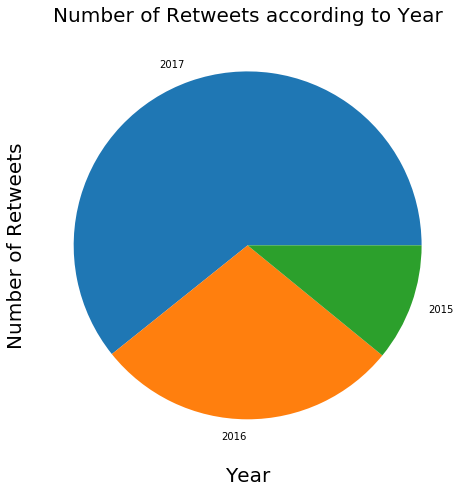

In [373]:
plt.figure(figsize=(8,8))
df.groupby('Year').mean()['retweets'].sort_values(ascending=False).plot(kind='pie')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Retweets', fontsize=20)
plt.title("Number of Retweets according to Year", fontsize=20)

In [336]:
#Year with the highest favorites

df.groupby('Year').mean()['favorites'].sort_values(ascending=False)

Year
2017    23733.117143
2016     7760.277056
2015     2483.183028
Name: favorites, dtype: float64

Text(0.5, 1.0, 'Number of Favorites according to Year')

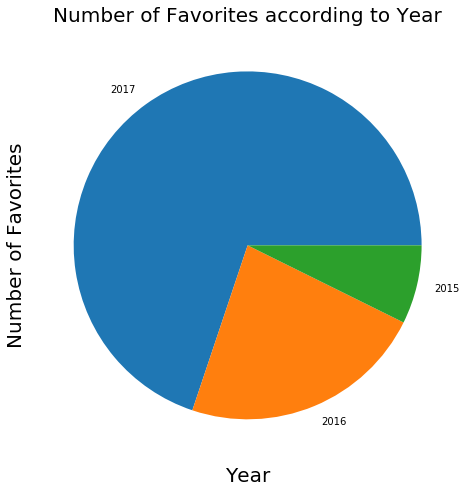

In [382]:
plt.figure(figsize=(8,8))
df.groupby('Year').mean()['favorites'].sort_values(ascending=False).plot(kind='pie')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Favorites', fontsize=20)
plt.title("Number of Favorites according to Year", fontsize=20)

In [337]:
#Number of dog status based on tweets
df.groupby('dog_status').count()['tweet_id'].sort_values(ascending=False)

dog_status
pupper     206
doggo       69
puppo       28
floofer      3
Name: tweet_id, dtype: int64

Text(0.5, 1.0, 'Number of Dog stages')

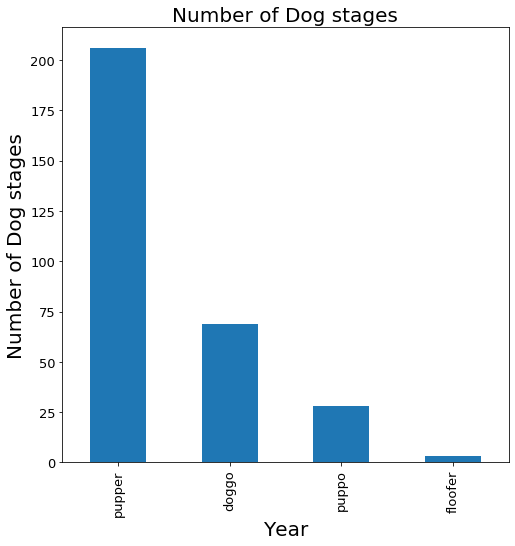

In [389]:
plt.figure(figsize=(8,8))
df.groupby('dog_status').count()['tweet_id'].sort_values(ascending=False).plot(kind='bar')
plt.tick_params(labelsize=13)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Dog stages', fontsize=20)
plt.title("Number of Dog stages", fontsize=20)

In [358]:
df.groupby('Month').count()['tweet_id'].sort_values(ascending=False)

Month
12    393
11    313
1     229
2     165
3     163
7     130
6     114
5      94
4      89
10     64
9      62
8      59
Name: tweet_id, dtype: int64

In [338]:
#Months with the highest retweets
df.groupby('Month').mean()['retweets'].sort_values(ascending=False)

Month
6     5193.315789
5     4326.042553
10    4267.390625
7     3890.192308
8     3845.203390
9     3715.016129
4     3446.449438
1     2930.764192
3     2607.165644
2     2572.569697
12    1967.111959
11    1308.332268
Name: retweets, dtype: float64

In [339]:
df.groupby('Month').mean()['favorites'].sort_values(ascending=False)

Month
6     17071.938596
5     15620.382979
7     15555.338462
10    13250.906250
4     12773.370787
9     11503.919355
8     11063.661017
2      9577.418182
3      9325.914110
1      8493.336245
12     5104.142494
11     3612.083067
Name: favorites, dtype: float64

In [340]:
df.rating.value_counts().sort_values(ascending=False)

1.200000      435
1.000000      392
1.100000      380
1.300000      256
0.900000      136
0.800000       88
0.700000       45
0.500000       32
1.400000       31
0.600000       30
0.300000       18
0.400000       12
0.200000        7
0.100000        4
0.000000        2
7.500000        1
2.600000        1
177.600000      1
0.636364        1
0.818182        1
42.000000       1
2.700000        1
Name: rating, dtype: int64

In [341]:
df.groupby('dog_status').mean()['rating'].sort_values(ascending=False)

dog_status
floofer    1.266667
puppo      1.214286
doggo      1.162319
pupper     1.062621
Name: rating, dtype: float64

In [342]:
df.groupby('Year').mean()['rating'].sort_values(ascending=False)

Year
2016    1.272353
2017    1.240000
2015    1.002829
Name: rating, dtype: float64

In [343]:
df.groupby('Month').mean()['rating'].sort_values(ascending=False)

Month
7     2.502308
10    1.267187
5     1.176596
9     1.146774
4     1.132584
6     1.109809
3     1.098160
8     1.096610
2     1.086061
11    1.084665
1     1.071775
12    0.990076
Name: rating, dtype: float64

In [360]:
#top ten ratings
df.groupby('name').count()['tweet_id'].sort_values(ascending=False).iloc[:12]

name
None       531
Charlie     11
Lucy        10
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Lola         7
Toby         7
Sadie        7
Daisy        7
Name: tweet_id, dtype: int64

In [359]:
df.rating.mean()

1.1799224242424224

In [345]:

df.rating.sort_values(ascending=False)[:10]

710     177.6
1634     42.0
493       7.5
543       2.7
1316      2.6
128       1.4
248       1.4
148       1.4
621       1.4
251       1.4
Name: rating, dtype: float64

Text(0.5, 1.0, 'Number of tweets according to Year')

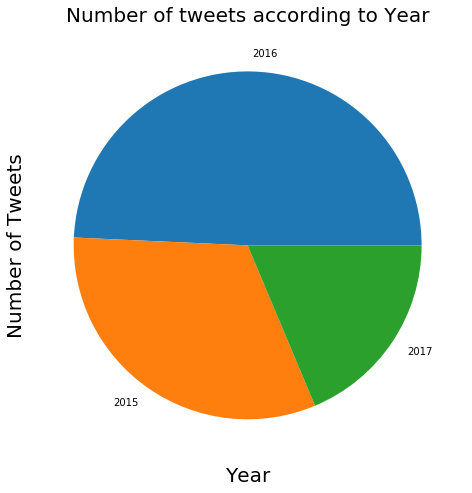

In [378]:
plt.figure(figsize=(8,8))
df.groupby('Year').count()['tweet_id'].sort_values(ascending=False).plot(kind='pie')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Tweets', fontsize=20)
plt.title("Number of tweets according to Year", fontsize=20)


In [347]:
def bar_plot(df, x, y):
    plt.figure(figsize=(30,10))
    df.groupby(x).mean()[y].sort_values(ascending=False).iloc[:10].plot(kind='barh')
    
    plt.xlabel(y, fontsize=40)
    plt.ylabel(x, fontsize=40)
    plt.tick_params(labelsize=30)
 
    plt.title('Top 10 '+ x +' based on ' + y , fontsize=50)
    plt.tight_layout()

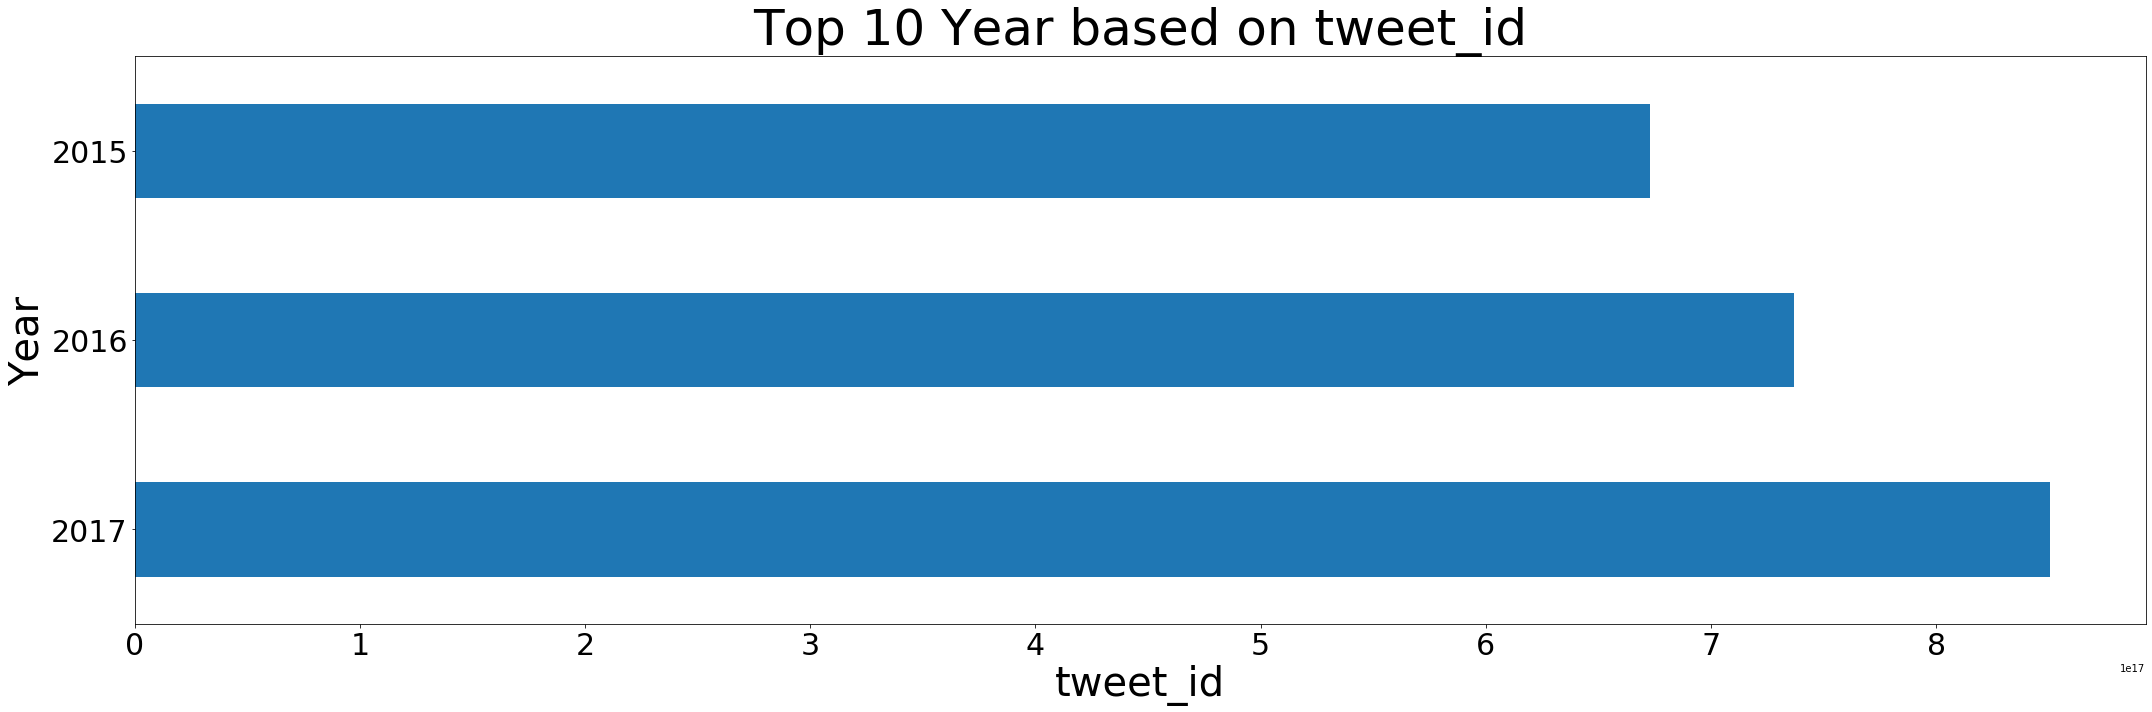

In [351]:
bar_plot(df, 'Year', 'tweet_id')

In [391]:
df.p1.value_counts()[:10]

golden_retriever      130
Labrador_retriever     89
Pembroke               84
Chihuahua              77
pug                    51
Samoyed                38
chow                   38
Pomeranian             36
toy_poodle             34
malamute               28
Name: p1, dtype: int64

In [394]:
df.p1_conf.mean()

0.59510062624

In [396]:
df.p1_dog.value_counts()[:10]

True     1388
False     487
Name: p1_dog, dtype: int64

In [397]:
df.rating_numerator.mean()

11.8

In [398]:
df.rating_numerator.value_counts()

12      435
10      392
11      380
13      256
9       137
8        88
7        46
5        32
14       31
6        30
3        18
4        12
2         7
1         4
0         2
420       1
26        1
27        1
75        1
1776      1
Name: rating_numerator, dtype: int64